In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
data = datasets.load_iris()

columns = np.array(data.feature_names) # Nazivi atributa
X = data.data # Atributi
y = data.target # Ciljna promenljiva / oznaka klase

In [3]:
data_values = np.concatenate((X, y.reshape((y.shape[0], 1))), axis=1)
iris_df = pd.DataFrame(data=data_values, columns=[col for col in columns] + ['class'])

In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [27]:
from sklearn.feature_selection import f_classif, SelectKBest, SequentialFeatureSelector

In [13]:
[F, p] = f_classif(X, y)
zipped = sorted(zip(columns, F, p), key=lambda x: x[1], reverse=True)
for el in zipped:
    print(f'{el[0]}: F={el[1]}, p={el[2]}')

petal length (cm): F=1180.1611822529776, p=2.85677661096213e-91
petal width (cm): F=960.0071468018025, p=4.169445839445089e-85
sepal length (cm): F=119.26450218449871, p=1.6696691907731882e-31
sepal width (cm): F=49.16004008961098, p=4.4920171333119905e-17


In [39]:
skb = SelectKBest(score_func=f_classif, k=3)
X_skb = skb.fit_transform(X, y)

In [40]:
remaining_cols = columns[skb.get_support()]
pd.DataFrame(data=X_skb, columns=remaining_cols)

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=2)
sfs = SequentialFeatureSelector(estimator=tree, n_features_to_select=3, direction='backward')
X_sfs = sfs.fit_transform(X, y)

In [44]:
remaining_cols = columns[sfs.get_support()]
pd.DataFrame(data=X_sfs, columns=remaining_cols)

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [63]:
tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)

In [64]:
tree.score(X, y)

0.96

In [65]:
tree.feature_importances_

array([0.        , 0.        , 0.56199095, 0.43800905])

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

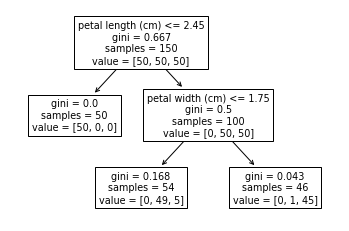

In [66]:
plot_tree(tree, feature_names=columns)

In [104]:
data_b = pd.read_csv('B_CELL_NAIVE_TPM.csv')
data_m = pd.read_csv('MONOCYTES_TPM.csv')
data_m2 = pd.read_csv('M2_TPM.csv')

In [68]:
data_b

,Feature_name,Transcript_Length(bp),Additional_annotations,0,1,2,3,4,5,6,...,81,82,83,84,85,86,87,88,89,90
0,ENSG00000000003.14,4535,TSPAN6;protein_coding,1.102855,0.787619,0.782210,0.743613,0.731157,0.722818,0.704557,...,0.137660,0.133081,0.122123,0.108031,0.071715,0.068885,0.067379,0.060864,0.000000,0.000000
1,ENSG00000000005.5,1610,TNMD;protein_coding,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSG00000000419.12,1207,DPM1;protein_coding,183.866738,176.360749,150.901130,147.246804,146.381212,144.753933,142.198343,...,84.510627,82.894723,81.582643,79.728881,79.454542,77.910694,77.796118,77.234762,67.594100,65.335429
3,ENSG00000000457.13,6883,SCYL3;protein_coding,32.043609,31.172579,30.732048,30.341668,30.287886,30.112584,29.892220,...,15.106233,14.981120,14.705860,14.276945,14.268698,12.641759,12.270348,12.222083,12.169092,10.503712
4,ENSG00000000460.16,5967,C1orf112;protein_coding,19.648137,17.902580,17.872048,17.755179,17.582137,17.037854,15.732126,...,10.246062,9.702637,9.647632,9.276205,9.264137,8.773519,8.537409,7.353267,6.385077,5.611507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58342,ENSG00000284744.1,987,AL591163.1;lincRNA,1.064406,0.959826,0.685362,0.501457,0.363795,0.353655,0.339033,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
58343,ENSG00000284745.1,1654,AL589702.1;lincRNA,0.182459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
58344,ENSG00000284746.1,219,AC068587.10;transcribed_unprocessed_pseudogene,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
58345,ENSG00000284747.1,4116,AL034417.4;antisense_RNA,4.704564,4.246672,4.189509,4.022531,3.805645,3.737218,3.689887,...,1.706345,1.644692,1.634897,1.628788,1.617128,1.574773,1.569729,1.521757,1.339152,0.808748


In [141]:
X_b_t = data_b.iloc[:, 3:]
X_b_m = data_m.iloc[:, 3:]
X_b_m2 = data_m2.iloc[:, 3:]

In [142]:
X = np.concatenate((X_b_t, X_b_m, X_b_m2), axis=1).T
X.shape

(272, 58347)

In [143]:
from sklearn.feature_selection import VarianceThreshold

In [144]:
vt = VarianceThreshold(0.2)
X_vt = vt.fit_transform(X)
X_vt.shape

(272, 25641)

In [145]:
y = np.array(([0] * X_b_t.shape[1]) + ([1] * X_b_m.shape[1]) + ([2] * X_b_m2.shape[1]))
genes = data_b.iloc[:, 0].values
genes_vt = genes[vt.get_support()]

In [146]:
skb = SelectKBest(score_func=f_classif, k=5)
X_skb = skb.fit_transform(X_vt, y)

In [147]:
remaining_cols = genes_vt[skb.get_support()]
skb_df = pd.DataFrame(data=X_skb, columns=remaining_cols)

In [148]:
skb_df

,ENSG00000072858.10,ENSG00000095585.16,ENSG00000148737.16,ENSG00000150995.18,ENSG00000161405.16
0,90.124926,310.360500,1.658771,223.909293,311.645820
1,88.120597,302.614930,1.528825,217.341783,304.880317
2,87.934619,296.857096,1.408593,208.347533,304.430536
3,86.980905,296.555714,1.352577,204.396344,303.888163
4,82.134028,292.983628,1.174357,195.902012,299.347232
...,...,...,...,...,...
267,0.528646,0.000000,289.654677,7.701824,0.421698
268,0.484217,0.000000,289.652666,7.595151,0.420667
269,0.446313,0.000000,282.568249,7.135626,0.391006
270,0.442240,0.000000,271.343713,7.042605,0.360155


In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_skb, y, test_size=0.3)
tree = DecisionTreeClassifier()
_ = tree.fit(X_train, y_train)

In [151]:
tree.score(X_train, y_train)

1.0

In [152]:
tree.score(X_test, y_test)

1.0

[Text(0.6, 0.8333333333333334, 'ENSG00000150995.18 <= 81.506\ngini = 0.667\nsamples = 190\nvalue = [63, 65, 62]'),
 Text(0.4, 0.5, 'ENSG00000148737.16 <= 151.387\ngini = 0.5\nsamples = 127\nvalue = [0, 65, 62]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 65\nvalue = [0, 65, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 62\nvalue = [0, 0, 62]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 63\nvalue = [63, 0, 0]')]

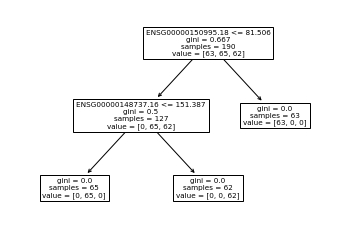

In [153]:
plot_tree(tree, feature_names=remaining_cols)

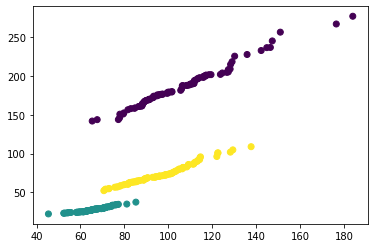

In [164]:
plt.scatter(X_sfs[:, 0], X_sfs[:, 1], c=y)

In [156]:
tree = DecisionTreeClassifier(max_depth=2)
sfs = SequentialFeatureSelector(estimator=tree, n_features_to_select=2, direction='forward')
X_sfs = sfs.fit_transform(X_vt, y)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_sfs, y, test_size=0.3)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

1.0

In [163]:
genes_vt[sfs.get_support()]

array(['ENSG00000000419.12', 'ENSG00000029725.16'], dtype=object)

[Text(0.4, 0.8333333333333334, 'ENSG00000095585.16 <= 43.376\ngini = 0.666\nsamples = 190\nvalue = [60, 66, 64]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 66\nvalue = [0, 66, 0]'),
 Text(0.6, 0.5, 'ENSG00000095585.16 <= 125.38\ngini = 0.499\nsamples = 124\nvalue = [60, 0, 64]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 64\nvalue = [0, 0, 64]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 60\nvalue = [60, 0, 0]')]

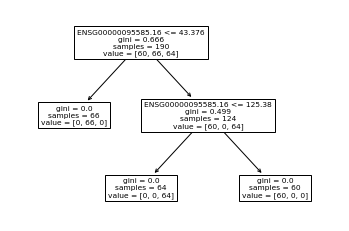

In [166]:
plot_tree(tree, feature_names=remaining_cols)